In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
csv_file = '/content/drive/MyDrive/disciplinas/PPGTI1009__PROGRAMAÇÃO_DISTRIBUÍDA/caso_full.csv'

In [ ]:
df = pd.read_csv(csv_file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

In [ ]:
df.head(20)

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0
5,NaN,12.0,2020-03-19,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0
6,Rio Branco,1200401.0,2020-03-20,202012,413418.0,407319.0,False,False,7,1.69320,2020-03-20,0.0,0,4,city,AC,3,0
7,NaN,12.0,2020-03-20,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0
8,Rio Branco,1200401.0,2020-03-21,202012,413418.0,407319.0,False,False,11,2.66075,2020-03-21,0.0,0,5,city,AC,4,0
9,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0


In [ ]:
df['city'].nunique()

5298

In [ ]:
colunas = ['city','city_ibge_code','date','estimated_population','last_available_confirmed_per_100k_inhabitants','last_available_death_rate','new_confirmed']
df = df[colunas]

In [ ]:
df = df.dropna(subset=['city'])
df = df.dropna(subset=['city_ibge_code'])

In [ ]:
# Converter a coluna 'data' para o tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar o DataFrame por cidade e data
df = df.sort_values(by=['city', 'date'])

df['city_ibge_code'] = df['city_ibge_code'].astype(int)

In [ ]:
df = df.reset_index()
df

,index,city,city_ibge_code,date,estimated_population,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,new_confirmed
0,626758,Abadia de Goiás,5200050,2020-05-21,8958.0,66.97924,0.0000,6
1,626868,Abadia de Goiás,5200050,2020-05-22,8958.0,55.81603,0.0000,-1
2,626985,Abadia de Goiás,5200050,2020-05-23,8958.0,55.81603,0.0000,0
3,627105,Abadia de Goiás,5200050,2020-05-24,8958.0,55.81603,0.0000,0
4,627226,Abadia de Goiás,5200050,2020-05-25,8958.0,66.97924,0.0000,1
...,...,...,...,...,...,...,...,...
3819878,3755288,Óleo,3533809,2022-03-23,2471.0,6313.23351,0.0321,0
3819879,3755935,Óleo,3533809,2022-03-24,2471.0,6313.23351,0.0321,0
3819880,3756582,Óleo,3533809,2022-03-25,2471.0,6313.23351,0.0321,0
3819881,3757229,Óleo,3533809,2022-03-26,2471.0,6313.23351,0.0321,0


In [ ]:
df_agrupado_por_cidade = pd.DataFrame(df[['city','index']].groupby('city').count())
df_agrupado_por_cidade

,index
city,
Abadia de Goiás,676
Abadia dos Dourados,689
Abadiânia,668
Abaetetuba,727
Abaeté,715
...,...
Áurea,681
Ângulo,671
Érico Cardoso,658


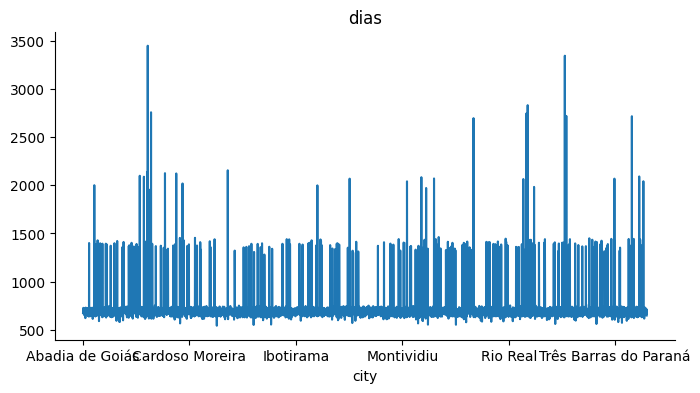

In [ ]:
df_agrupado_por_cidade['index'].plot(kind='line', figsize=(8, 4), title='dias')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819883 entries, 0 to 3819882
Data columns (total 8 columns):
 #   Column                                         Dtype         
---  ------                                         -----         
 0   index                                          int64         
 1   city                                           object        
 2   city_ibge_code                                 int64         
 3   date                                           datetime64[ns]
 4   estimated_population                           float64       
 5   last_available_confirmed_per_100k_inhabitants  float64       
 6   last_available_death_rate                      float64       
 7   new_confirmed                                  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 233.1+ MB


In [ ]:
# Função para criar janelas de tempo
def create_time_windows(df, window_size, horizon):
    X, y = [], []
    for i in range(len(df) - window_size - horizon + 1):
        X.append(df['new_confirmed'].iloc[i:i + window_size].values)
        y.append(df['new_confirmed'].iloc[i + window_size:i + window_size + horizon].values)
    return np.array(X), np.array(y)

# Parâmetros da janela de tempo
window_size = 10  # Tamanho da janela histórica
horizon = 5   # Horizonte de previsão (quantos passos no futuro queremos prever)

In [ ]:
all_cities = list(df['city_ibge_code'].unique())
random.seed(809)
cities = random.sample(all_cities, 385)

In [ ]:
len(cities)

385

In [ ]:
# Criar janelas de tempo para cada cidade
X_list, y_list = [], []
for idx, city in enumerate(cities):
    city_df = df[df['city_ibge_code'] == city]
    X_city, y_city = create_time_windows(city_df, window_size, horizon)
    X_list.append(X_city)
    y_list.append(y_city)
    print(idx)

# Concatenar os dados de todas as cidades
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

# Verificar os formatos das amostras e rótulos
print(f'Formato de X: {X.shape}')
print(f'Formato de y: {y.shape}')

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar os formatos dos conjuntos de treino e teste
print(f'Formato de X_train: {X_train.shape}')
print(f'Formato de X_test: {X_test.shape}')
print(f'Formato de y_train: {y_train.shape}')
print(f'Formato de y_test: {y_test.shape}')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
len(y)

258474

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Treinar o modelo de Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = lr.predict(X_test)

# Avaliar o modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE Regressão Linear: {mse_lr}')

MSE Regressão Linear: 806.5259988750759


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Treinar o modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE Random Forest: {mse_rf}')


MSE Random Forest: 843.7618061267376


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Reformatar os dados para LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(horizon))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o modelo LSTM
model.fit(X_train_lstm, y_train, epochs=30, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=2)

# Fazer previsões
y_pred_lstm = model.predict(X_test_lstm)

# Avaliar o modelo
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'MSE LSTM: {mse_lstm}')


Epoch 1/30
3231/3231 - 37s - loss: 1215.2466 - val_loss: 901.8143 - 37s/epoch - 12ms/step
Epoch 2/30
3231/3231 - 22s - loss: 1109.7961 - val_loss: 851.5853 - 22s/epoch - 7ms/step
Epoch 3/30
3231/3231 - 23s - loss: 1072.7020 - val_loss: 827.0070 - 23s/epoch - 7ms/step
Epoch 4/30
3231/3231 - 21s - loss: 1057.6112 - val_loss: 817.7487 - 21s/epoch - 7ms/step
Epoch 5/30
3231/3231 - 29s - loss: 1047.7831 - val_loss: 820.5664 - 29s/epoch - 9ms/step
Epoch 6/30
3231/3231 - 35s - loss: 1042.7638 - val_loss: 806.6705 - 35s/epoch - 11ms/step
Epoch 7/30
3231/3231 - 23s - loss: 1040.0714 - val_loss: 809.1438 - 23s/epoch - 7ms/step
Epoch 8/30
3231/3231 - 21s - loss: 1036.9329 - val_loss: 806.0430 - 21s/epoch - 7ms/step
Epoch 9/30
3231/3231 - 37s - loss: 1037.0592 - val_loss: 807.1431 - 37s/epoch - 11ms/step
Epoch 10/30
3231/3231 - 24s - loss: 1033.0022 - val_loss: 799.9287 - 24s/epoch - 7ms/step
Epoch 11/30
3231/3231 - 23s - loss: 1030.2168 - val_loss: 798.3356 - 23s/epoch - 7ms/step
Epoch 12/30
3231

In [ ]:
print(f'MSE Regressão Linear: {mse_lr}')
print(f'MSE Random Forest: {mse_rf}')
print(f'MSE LSTM: {mse_lstm}')


MSE Regressão Linear: 806.5259988750759
MSE Random Forest: 843.7618061267376
MSE LSTM: 789.2268429008107


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fazer previsões no conjunto de teste
y_pred_lstm = model.predict(X_test)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred_lstm)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_lstm)

# Calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_lstm)

# Calcular R²
r2 = r2_score(y_test, y_pred_lstm)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R²: {r2}')


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_3' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_3' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
2/0

In [ ]:
# Selecionar a última janela de tempo do conjunto de dados
last_window = df['new_confirmed'].values[-window_size:]
last_window = last_window.reshape((1, window_size, 1))

# Fazer previsão dos próximos 5 dias
future_predictions = model.predict(last_window)
print("Previsão para os próximos 5 dias:", future_predictions)


In [ ]:
# Treinar o modelo LSTM (conforme mostrado anteriormente)
#model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Salvar o modelo para uso futuro
model.save('covid_lstm.h5')
print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

last_window = df['new_confirmed'].values[-window_size:]
last_window = last_window.reshape((1, window_size, 1))
print(last_window)
X_test = last_window

[[[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]]


In [ ]:
from tensorflow.keras.models import Sequential, load_model
# Carregar o modelo salvo
model_carregado = load_model('covid_lstm.h5')
print("Modelo carregado com sucesso!")

# Fazer previsões usando o modelo carregado
y_pred_carregado = model_carregado.predict(X_test)
print(y_pred_carregado)

Modelo carregado com sucesso!
1/1 [==============================] - 1s 1s/step
[[1.1369395  1.1497211  0.8807082  0.9648967  0.94281054]]
